<a href="https://colab.research.google.com/github/judith182/proyecto-portafolio/blob/main/Tendencia_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problema 1**
Con el conjunto de datos de ventas mensuales proporcionado para una tienda minorista.
Crea un gráfico utilizando seaborn para visualizar la tendencia de ventas durante los últimos
5 años.

0   1999-01-01
1   1999-02-01
2   1999-03-01
3   1999-04-01
4   1999-05-01
Name: date, dtype: datetime64[ns]
1999-01-01 00:00:00 2010-12-01 00:00:00
Datos entre 1999 y 2010: 144 registros


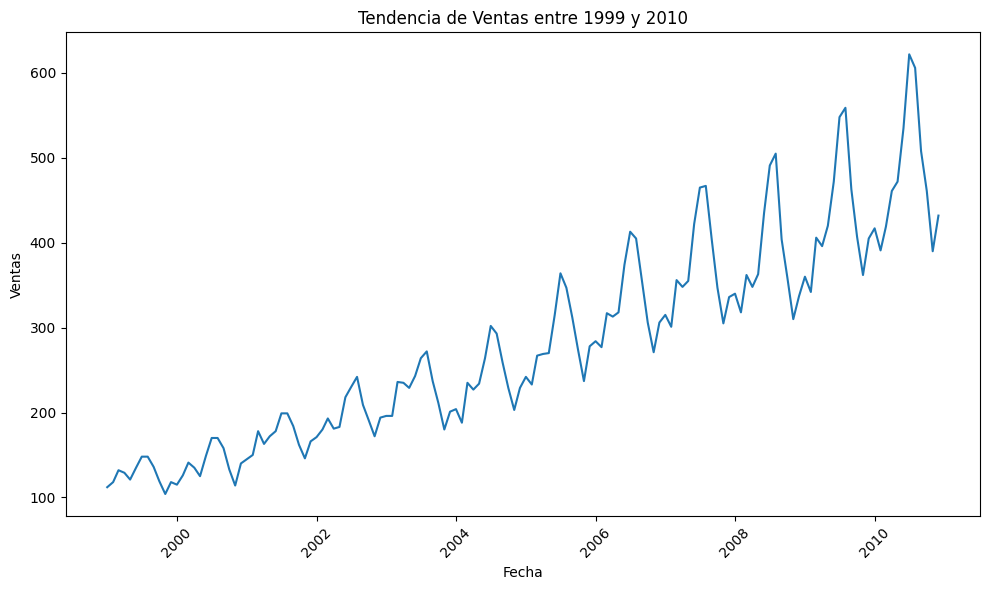

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sales_sample.csv')


df['date'] = pd.to_datetime(df['date'])


print(df['date'].head())
print(df['date'].min(), df['date'].max())


fecha_inicio = pd.to_datetime('1999-01-01')
fecha_fin = pd.to_datetime('2010-12-31')


df_filtrado = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_fin)]


print(f"Datos entre 1999 y 2010: {df_filtrado.shape[0]} registros")


if df_filtrado.shape[0] > 0:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_filtrado, x='date', y='sales')


    plt.title('Tendencia de Ventas entre 1999 y 2010')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.xticks(rotation=45)


    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron datos en el rango de fechas de 1999 a 2010.")


**PREGUNTA 2**  Supongamos que estás trabajando con un conjunto de datos que contiene una columna con
fechas. ¿Cómo crearías una nueva característica que represente el día de la semana (por
ejemplo, lunes, martes, etc.) a partir de la columna de fechas? Escribe el código
correspondiente tomando de referencia el conjunto de la pregunta 1.

In [ ]:
import pandas as pd


df = pd.read_csv('/content/sales_sample.csv')


df['date'] = pd.to_datetime(df['date'])


df['day_of_week'] = df['date'].dt.day_name()


print(df[['date', 'day_of_week']].head())


        date day_of_week
0 1999-01-01      Friday
1 1999-02-01      Monday
2 1999-03-01      Monday
3 1999-04-01    Thursday
4 1999-05-01    Saturday


**PREGUNTA 3**

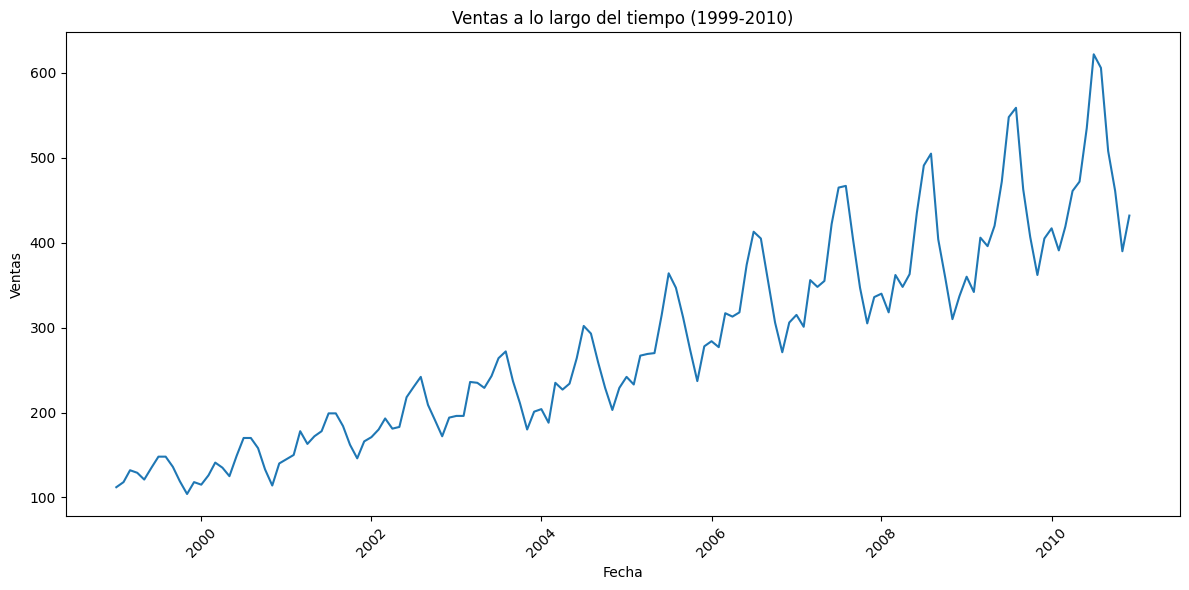

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sales_sample.csv')


df['date'] = pd.to_datetime(df['date'])


fecha_inicio = pd.to_datetime('1999-01-01')
fecha_fin = pd.to_datetime('2010-12-31')
df_filtrado = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_fin)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x='date', y='sales')
plt.title('Ventas a lo largo del tiempo (1999-2010)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


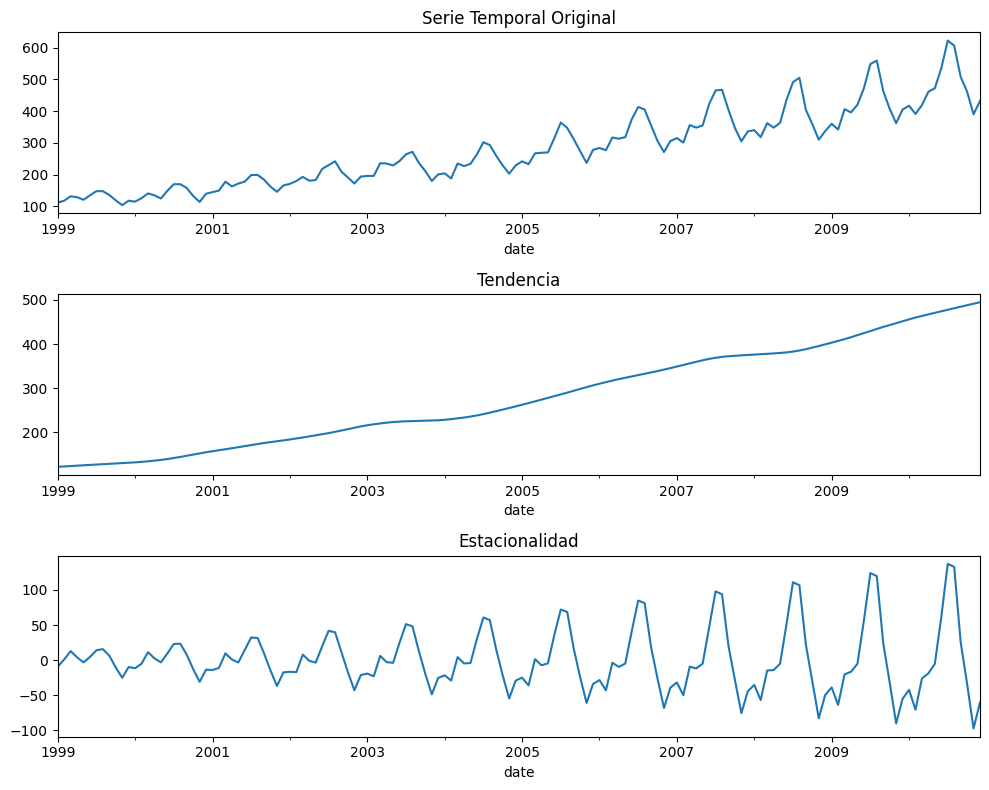

In [ ]:
from statsmodels.tsa.seasonal import STL

df_filtrado = df_filtrado.sort_values(by='date')


df_filtrado.set_index('date', inplace=True)


stl = STL(df_filtrado['sales'], seasonal=13)
result = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8))
result.observed.plot(ax=ax1, title='Serie Temporal Original')
result.trend.plot(ax=ax2, title='Tendencia')
result.seasonal.plot(ax=ax3, title='Estacionalidad')
plt.tight_layout()
plt.show()


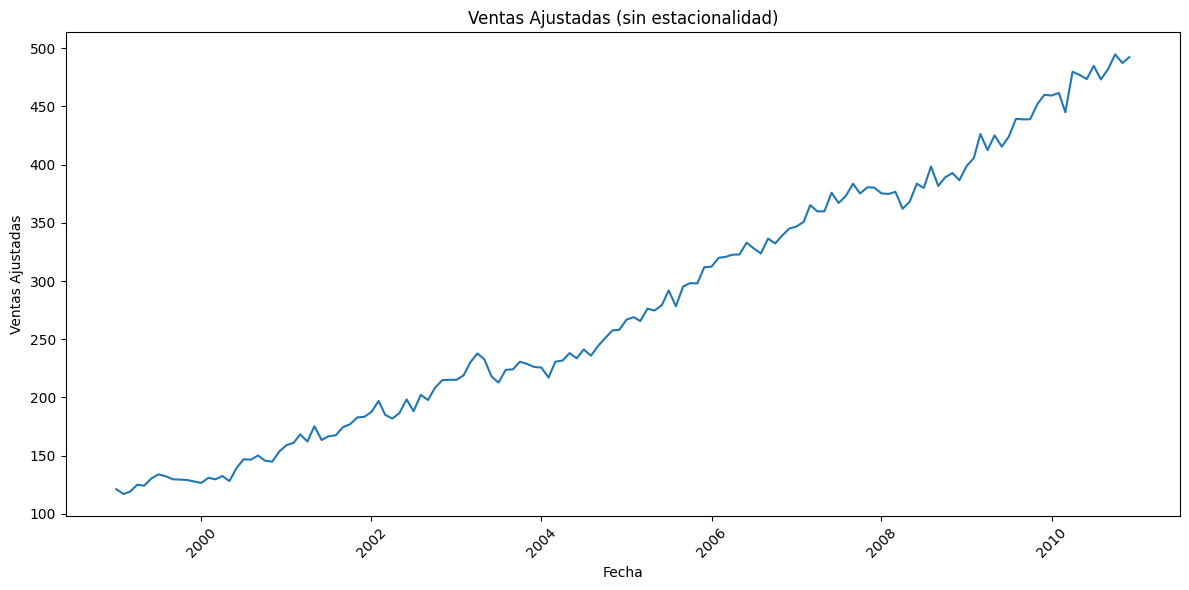

In [ ]:

df_filtrado['sales_adjusted'] = df_filtrado['sales'] - result.seasonal


plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x=df_filtrado.index, y='sales_adjusted')
plt.title('Ventas Ajustadas (sin estacionalidad)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Ajustadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


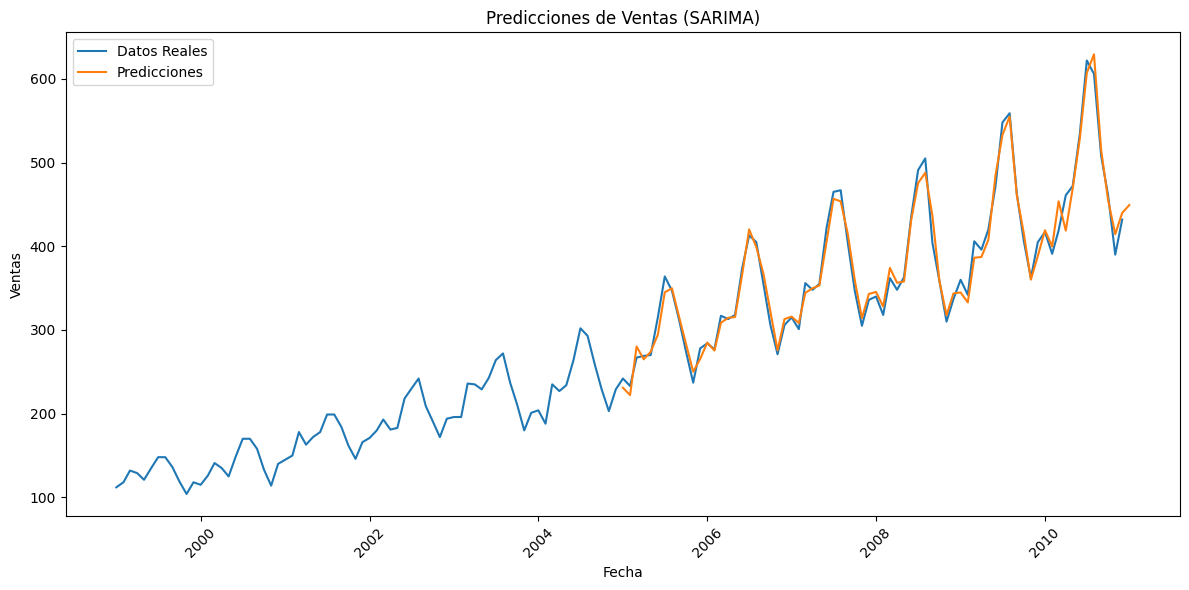

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(df_filtrado['sales'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
results = model.fit()


predictions = results.predict(start='2005-01-01', end='2010-12-31')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x=df_filtrado.index, y='sales', label='Datos Reales')
sns.lineplot(x=predictions.index, y=predictions, label='Predicciones')
plt.title('Predicciones de Ventas (SARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**PREGUNTA 4**

In [ ]:
pip install pyodbc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pyodbc
import pandas as pd


server = 'localhost'
database = 'VentasDB'
username = 'usuario'
password = 'contraseña'


connection = pyodbc.connect(f'DRIVER={{SQL Server}};'
                            f'SERVER={server};'
                            f'DATABASE={database};'
                            f'UID={username};'
                            f'PWD={password}')


query = '''
SELECT date, sales
FROM ventas  -- Nombre de la tabla de ventas (ajustar según sea necesario)
ORDER BY date;
'''


df = pd.read_sql(query, connection)


df['date'] = pd.to_datetime(df['date'])


df['moving_average_3_months'] = df['sales'].rolling(window=3).mean()


print(df.head(10))


**PREGUNTA 5**

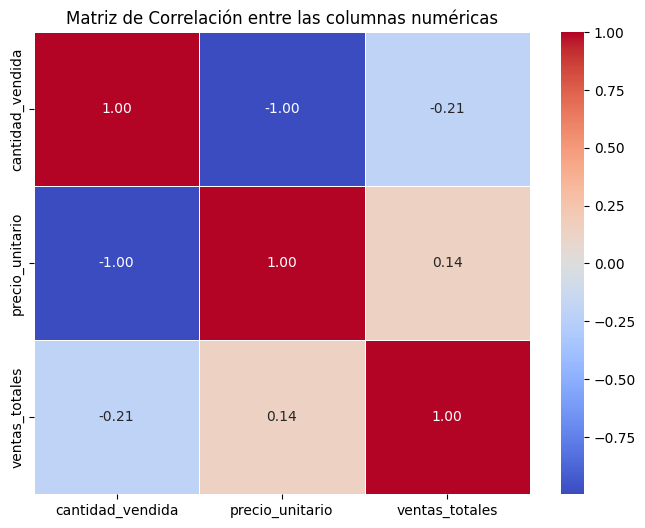

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'fecha': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'producto': ['ProductoA', 'ProductoB', 'ProductoA', 'ProductoB'],
    'cantidad_vendida': [10, 20, 30, 10],
    'precio_unitario': [50, 30, 15, 50]
}

ventas = pd.DataFrame(data)


ventas['ventas_totales'] = ventas['cantidad_vendida'] * ventas['precio_unitario']


ventas_numericas = ventas[['cantidad_vendida', 'precio_unitario', 'ventas_totales']]


correlation_matrix = ventas_numericas.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las columnas numéricas')
plt.show()


**PREGUNTA 6**

In [ ]:
import pandas as pd


data = {
    'id_empleado': [1, 2, 3, 4, 5],
    'departamento': ['Ventas', 'TI', 'Marketing', 'TI', 'Ventas'],
    'salario_mensual': [4000, 8000, 6000, 15000, 3500]
}

datos_salarios = pd.DataFrame(data)


Q1 = datos_salarios['salario_mensual'].quantile(0.25)
Q3 = datos_salarios['salario_mensual'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


valores_atipicos = datos_salarios[(datos_salarios['salario_mensual'] < limite_inferior) |
                                  (datos_salarios['salario_mensual'] > limite_superior)]

print("Valores atípicos identificados:")
print(valores_atipicos)


datos_salarios_limpio = datos_salarios[(datos_salarios['salario_mensual'] >= limite_inferior) &
                                       (datos_salarios['salario_mensual'] <= limite_superior)]


print("\nDataFrame sin valores atípicos:")
print(datos_salarios_limpio)


Valores atípicos identificados:
   id_empleado departamento  salario_mensual
3            4           TI            15000

DataFrame sin valores atípicos:
   id_empleado departamento  salario_mensual
0            1       Ventas             4000
1            2           TI             8000
2            3    Marketing             6000
4            5       Ventas             3500


**PREGUNTA 14**

In [ ]:
import boto3

client = boto3.client('rekognition')

with open('imagen.jpg', 'rb') as image_file:
    image_bytes = image_file.read()

response = client.detect_labels(
    Image={'Bytes': image_bytes},
    MaxLabels=10,
    MinConfidence=75
)

for label in response['Labels']:
    print(f"{label['Name']}: {label['Confidence']:.2f}%")


In [ ]:
import boto3

client = boto3.client('comprehend')

text = "Me encanta este producto, es excelente."

response = client.detect_sentiment(
    Text=text,
    LanguageCode='es'
)

print(f"Sentimiento: {response['Sentiment']}")


In [ ]:
import boto3

client = boto3.client('polly')

text = "Bienvenido a nuestra aplicación."

response = client.synthesize_speech(
    Text=text,
    VoiceId='Joanna',
    OutputFormat='mp3',
    LanguageCode='es-ES'
)

with open('output.mp3', 'wb') as file:
    file.write(response['AudioStream'].read())


**PREGUNTA 15**

In [ ]:
import boto3


comprehend = boto3.client('comprehend', region_name='us-east-1')


def analizar_sentimiento(texto):
    response = comprehend.detect_sentiment(Text=texto, LanguageCode='es')  # Ajusta el idioma si es necesario
    return response['Sentiment']


reseña = "Este producto es increíble, me encantó"
sentimiento = analizar_sentimiento(reseña)
print(f"Sentimiento: {sentimiento}")


Preprocesar las reseñas para que el modelo pueda analizarlas de manera efectiva.
Usar Amazon Comprehend (preentrenado) o entrenar un modelo personalizado en SageMaker.
Desplegar el modelo para hacer predicciones en tiempo real, ya sea utilizando un servicio preentrenado como Comprehend o un modelo personalizado desplegado en un endpoint de SageMaker.
Este flujo te permitirá analizar las reseñas de productos y clasificar el sentimiento de cada una de forma eficiente usando AWS SageMaker.


Lo que se resolvió en la explicación anterior fue cómo implementar una solución de **análisis de sentimiento** utilizando **AWS SageMaker** para un caso práctico en el que un cliente necesita clasificar el sentimiento (positivo, negativo o neutral) de reseñas de productos.

Los pasos cubiertos fueron:

1. **Preprocesamiento de los datos**: Cómo preparar las reseñas de texto para ser procesadas por un modelo de análisis de sentimiento (limpiar, tokenizar, eliminar palabras vacías, etc.).
   
2. **Entrenamiento de un modelo de análisis de sentimiento**:
   - **Opción 1**: Usar un modelo preentrenado en **Amazon Comprehend**, que es un servicio fácil de usar para análisis de sentimientos sin necesidad de entrenar un modelo desde cero.
   - **Opción 2**: Usar **AWS SageMaker** para entrenar un modelo personalizado de análisis de sentimientos si el cliente necesita algo más específico o ajustado a sus datos.

3. **Despliegue del modelo para predicciones en tiempo real**:
   - Si se usa **Amazon Comprehend**, no necesitas crear un endpoint, ya que el servicio ya está preparado para hacer predicciones en tiempo real.
   - Si se usa **SageMaker**, el modelo debe ser desplegado en un endpoint para hacer predicciones de manera continua con nuevas reseñas.

Este flujo de trabajo te permite automatizar el análisis de sentimiento de miles de reseñas de productos, ya sea utilizando un modelo preentrenado o uno entrenado desde cero según las necesidades del cliente.